In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 
import matplotlib.pyplot as plot
import numpy as np
#!pip install cpi
import cpi

In [2]:
cpi.update()

In [3]:
pitching = pd.read_csv('Labor Data\Pitching.csv')
#Only salary data after 1983
pitching=pitching[pitching['yearID']>= 1985]
pitching = pitching.dropna()
pitching = pitching.drop(columns=['stint'])

pitching.head()

,playerID,yearID,teamID,lgID,W,L,G,GS,CG,SHO,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
24984,aasedo01,1985,BAL,AL,10,6,54,0,0,0,...,7.0,0,1.0,1,366.0,43,44,5.0,3.0,13.0
24985,abregjo01,1985,CHN,NL,1,1,6,5,0,0,...,1.0,0,0.0,0,109.0,0,18,5.0,1.0,3.0
24986,ackerji01,1985,TOR,AL,7,2,61,0,0,0,...,1.0,2,3.0,0,370.0,26,35,1.0,2.0,16.0
24987,agostju01,1985,CHA,AL,4,3,54,0,0,0,...,1.0,0,3.0,0,246.0,21,27,3.0,3.0,4.0
24988,aguilri01,1985,NYN,NL,10,7,21,19,2,0,...,2.0,5,2.0,2,507.0,1,49,7.0,4.0,8.0


In [4]:
coleP = pitching[pitching['playerID'] == 'colege01']
coleP

,playerID,yearID,teamID,lgID,W,L,G,GS,CG,SHO,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
41995,colege01,2013,PIT,NL,10,7,19,19,0,0,...,0.0,4,3.0,0,469.0,0,43,5.0,2.0,15.0
42716,colege01,2014,PIT,NL,11,5,22,22,0,0,...,1.0,9,9.0,1,571.0,0,58,10.0,0.0,9.0
43473,colege01,2015,PIT,NL,19,8,32,32,0,0,...,1.0,7,10.0,0,832.0,0,71,7.0,6.0,22.0
44281,colege01,2016,PIT,NL,7,10,21,21,1,0,...,3.0,5,6.0,1,506.0,0,57,4.0,6.0,9.0
45111,colege01,2017,PIT,NL,12,12,33,33,0,0,...,1.0,7,4.0,0,849.0,0,98,5.0,1.0,16.0
45959,colege01,2018,HOU,AL,15,5,32,32,1,1,...,0.0,9,7.0,0,799.0,0,68,2.0,3.0,11.0
46868,colege01,2019,HOU,AL,20,5,33,33,0,0,...,0.0,4,3.0,3,817.0,0,66,1.0,3.0,7.0
47768,colege01,2020,NYA,AL,7,3,12,12,2,1,...,0.0,2,2.0,0,288.0,0,27,0.0,0.0,3.0


In [5]:
fielding = pd.read_csv('Labor Data\Fielding.csv')
fielding.head()
fielding = fielding.fillna(0)
fielding.head()

#Having Catcher stats might skew data for other positions
fielding=fielding.drop(columns=["teamID", "lgID", 'stint', 'PB', 'WP','SB', 'CS', 'ZR', 'G', 'GS'])
#Only salary data after 1985
fielding=fielding[fielding['yearID']>= 1985]
#Only pitchers
fielding=fielding[fielding['POS']=='P']
#dropping Pos column b/c only pitchers
fielding=fielding.drop(columns=['POS'])
                       
fielding

,playerID,yearID,InnOuts,PO,A,E,DP
84277,aasedo01,1985,264.0,8,10,0.0,0
84278,abregjo01,1985,72.0,1,6,1.0,0
84279,ackerji01,1985,259.0,10,16,0.0,1
84283,agostju01,1985,181.0,10,15,1.0,0
84287,aguilri01,1985,367.0,8,16,0.0,1
...,...,...,...,...,...,...,...
144761,zeuchtj01,2020,34.0,0,0,0.0,0
144763,zimmebr02,2020,21.0,0,0,0.0,0
144764,zimmejo02,2020,17.0,0,1,0.0,0
144765,zimmeky01,2020,69.0,2,4,0.0,1


In [6]:
coleF = fielding[fielding['playerID']=='colege01']
coleF

,playerID,yearID,InnOuts,PO,A,E,DP
129607,colege01,2013,352.0,7,13,1.0,2
131426,colege01,2014,414.0,7,24,2.0,1
133293,colege01,2015,624.0,10,37,0.0,1
135227,colege01,2016,348.0,11,24,2.0,1
137172,colege01,2017,609.0,16,30,2.0,5
139185,colege01,2018,601.0,10,15,1.0,2
141295,colege01,2019,637.0,14,12,0.0,0
143350,colege01,2020,219.0,5,2,0.0,0


In [28]:
salaries = pd.read_csv('Labor Data\Salaries.csv')
salaries.head()
salaries = salaries.dropna()
salaries = salaries.drop(columns=["teamID", "lgID"])
salaries.head()

,yearID,playerID,salary
0,1985,barkele01,870000
1,1985,bedrost01,550000
2,1985,benedbr01,545000
3,1985,campri01,633333
4,1985,ceronri01,625000


In [29]:
coleS = salaries[salaries['playerID']=='colege01']
coleS

,yearID,playerID,salary
24519,2014,colege01,512500
25334,2015,colege01,531000
26179,2016,colege01,548000


In [30]:
print(len(salaries))

26428


In [31]:
salaries

,yearID,playerID,salary
0,1985,barkele01,870000
1,1985,bedrost01,550000
2,1985,benedbr01,545000
3,1985,campri01,633333
4,1985,ceronri01,625000
...,...,...,...
26423,2016,strasst01,10400000
26424,2016,taylomi02,524000
26425,2016,treinbl01,524900
26426,2016,werthja01,21733615


In [32]:
def inflate(x):
    return cpi.inflate(salaries['salary'][x], salaries['yearID'][x])

In [33]:
salaries['ADJ Salary'] = [cpi.inflate(salaries.loc[i, 'salary'], salaries.loc[i, 'yearID']) for i in range(len(salaries))]
salaries

,yearID,playerID,salary,ADJ Salary
0,1985,barkele01,870000,2.092617e+06
1,1985,bedrost01,550000,1.322919e+06
2,1985,benedbr01,545000,1.310892e+06
3,1985,campri01,633333,1.523360e+06
4,1985,ceronri01,625000,1.503317e+06
...,...,...,...,...
26423,2016,strasst01,10400000,1.121482e+07
26424,2016,taylomi02,524000,5.650542e+05
26425,2016,treinbl01,524900,5.660247e+05
26426,2016,werthja01,21733615,2.343639e+07


In [34]:
pitchers = pd.merge(fielding, pitching, on=["playerID", "yearID"])
pitchers.head()

,playerID,yearID,InnOuts,PO,A,E,DP,teamID,lgID,W,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,aasedo01,1985,264.0,8,10,0.0,0,BAL,AL,10,...,7.0,0,1.0,1,366.0,43,44,5.0,3.0,13.0
1,abregjo01,1985,72.0,1,6,1.0,0,CHN,NL,1,...,1.0,0,0.0,0,109.0,0,18,5.0,1.0,3.0
2,ackerji01,1985,259.0,10,16,0.0,1,TOR,AL,7,...,1.0,2,3.0,0,370.0,26,35,1.0,2.0,16.0
3,agostju01,1985,181.0,10,15,1.0,0,CHA,AL,4,...,1.0,0,3.0,0,246.0,21,27,3.0,3.0,4.0
4,aguilri01,1985,367.0,8,16,0.0,1,NYN,NL,10,...,2.0,5,2.0,2,507.0,1,49,7.0,4.0,8.0


In [35]:
pitchers = pd.merge(salaries, pitchers, on=["playerID", "yearID"])
pitchers.head()

,yearID,playerID,salary,ADJ Salary,InnOuts,PO,A,E,DP,teamID,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,1985,barkele01,870000,2.092617e+06,221.0,2,9,1.0,0,ATL,...,1.0,3,1.0,0,335.0,1,55,4.0,1.0,4.0
1,1985,bedrost01,550000,1.322919e+06,620.0,13,23,4.0,3,ATL,...,6.0,6,5.0,0,907.0,0,101,6.0,7.0,17.0
2,1985,campri01,633333,1.523360e+06,383.0,7,13,4.0,3,ATL,...,11.0,4,5.0,0,569.0,23,72,4.0,4.0,24.0
3,1985,dedmoje01,150000,3.607960e+05,258.0,9,27,2.0,4,ATL,...,14.0,2,1.0,1,377.0,15,52,8.0,1.0,17.0
4,1985,forstte01,483333,1.162564e+06,178.0,2,7,1.0,0,ATL,...,4.0,1,0.0,0,253.0,19,22,2.0,2.0,7.0


In [36]:
pitchers.columns

Index(['yearID', 'playerID', 'salary', 'ADJ Salary', 'InnOuts', 'PO', 'A', 'E',
       'DP', 'teamID', 'lgID', 'W', 'L', 'G', 'GS', 'CG', 'SHO', 'SV',
       'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp', 'ERA', 'IBB', 'WP',
       'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP'],
      dtype='object')

In [37]:
cole = pitchers[pitchers['playerID'] == 'colege01']
cole

,yearID,playerID,salary,ADJ Salary,InnOuts,PO,A,E,DP,teamID,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
14819,2014,colege01,512500,560289.256809,414.0,7,24,2.0,1,PIT,...,1.0,9,9.0,1,571.0,0,58,10.0,0.0,9.0
15379,2015,colege01,531000,579826.092643,624.0,10,37,0.0,1,PIT,...,1.0,7,10.0,0,832.0,0,71,7.0,6.0,22.0
15939,2016,colege01,548000,590934.547742,348.0,11,24,2.0,1,PIT,...,3.0,5,6.0,1,506.0,0,57,4.0,6.0,9.0


In [38]:
pitchers.to_csv("pitchers_final.csv", index='false')

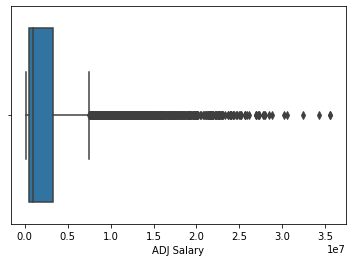

In [42]:
sns.boxplot(x=pitchers["ADJ Salary"]);

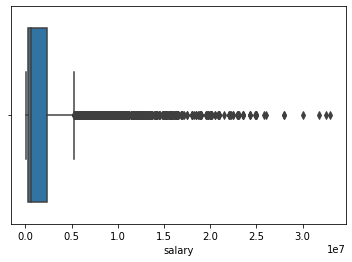

In [43]:
sns.boxplot(x=pitchers["salary"]);

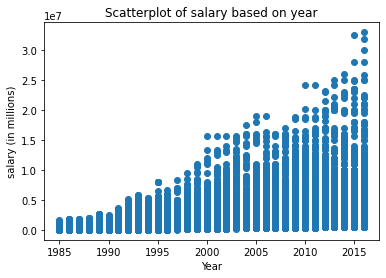

In [40]:
plot.scatter(pitchers['yearID'], pitchers['salary'])
plot.title('Scatterplot of salary based on year')
plot.xlabel('Year')
plot.ylabel('salary (in millions)')

plot.show()

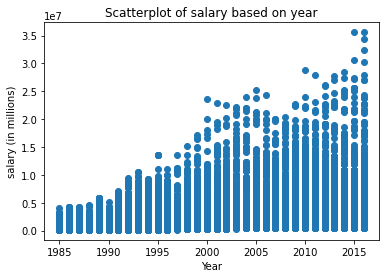

In [44]:
plot.scatter(pitchers['yearID'], pitchers['ADJ Salary'])
plot.title('Scatterplot of Adjusted salary based on year')
plot.xlabel('Year')
plot.ylabel('salary (in millions)')

plot.show()